In [1]:
# read write https://www.youtube.com/watch?v=pkNJdko-9zI
# column manipulation https://www.youtube.com/watch?v=hcqpwrCDOco
#visualisation https://www.youtube.com/watch?v=pt85jGDGFtU

#pandas are faster and more efficient, mst of the time


In [2]:
import pandas as pd
from pandas import DataFrame

import datetime #the next two lines only to be able to import data from Yahoo finance
import pandas.io.data

C:\Users\Olga and Jean\Anaconda2\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [3]:
sp500 = pd.io.data.get_data_yahoo('%5EGSPC',
                                  start = datetime.datetime(2000, 10, 1),
                                  end = datetime.datetime(2014, 6, 11))



In [4]:
sp500.head() #to only see the structure of the data

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-10-02,1436.520020,1445.599976,1429.829956,1436.229980,1051200000,1436.229980
2000-10-03,1436.229980,1454.819946,1425.280029,1426.459961,1098100000,1426.459961
2000-10-04,1426.459961,1439.989990,1416.310059,1434.319946,1167400000,1434.319946
2000-10-05,1434.319946,1444.170044,1431.800049,1436.280029,1176100000,1436.280029
2000-10-06,1436.280029,1443.300049,1397.060059,1408.989990,1150100000,1408.989990


In [5]:
sp500.to_csv('sp500_ohlc.csv')#very simple saving 

In [6]:
df = pd.read_csv('sp500_ohlc.csv');
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2000-10-02,1436.520020,1445.599976,1429.829956,1436.229980,1051200000,1436.229980
1,2000-10-03,1436.229980,1454.819946,1425.280029,1426.459961,1098100000,1426.459961
2,2000-10-04,1426.459961,1439.989990,1416.310059,1434.319946,1167400000,1434.319946
3,2000-10-05,1434.319946,1444.170044,1431.800049,1436.280029,1176100000,1436.280029
4,2000-10-06,1436.280029,1443.300049,1397.060059,1408.989990,1150100000,1408.989990


In [7]:
df = pd.read_csv('sp500_ohlc.csv', index_col = 'Date', parse_dates=True); #Date to become an Index
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-10-02,1436.520020,1445.599976,1429.829956,1436.229980,1051200000,1436.229980
2000-10-03,1436.229980,1454.819946,1425.280029,1426.459961,1098100000,1426.459961
2000-10-04,1426.459961,1439.989990,1416.310059,1434.319946,1167400000,1434.319946
2000-10-05,1434.319946,1444.170044,1431.800049,1436.280029,1176100000,1436.280029
2000-10-06,1436.280029,1443.300049,1397.060059,1408.989990,1150100000,1408.989990


In [8]:
df2=df['Open']; #pull out only certain column
df2.head()

Date
2000-10-02    1436.520020
2000-10-03    1436.229980
2000-10-04    1426.459961
2000-10-05    1434.319946
2000-10-06    1436.280029
Name: Open, dtype: float64

In [9]:
df3=df[['Open', 'Close']]; #or more then one column
df3.head()

,Open,Close
Date,,
2000-10-02,1436.520020,1436.229980
2000-10-03,1436.229980,1426.459961
2000-10-04,1426.459961,1434.319946
2000-10-05,1434.319946,1436.280029
2000-10-06,1436.280029,1408.989990


In [10]:
df3.rename(columns={'Close':'CLOSE'}, inplace=True); #rename columns in the new DF
df3.head()                    

C:\Users\Olga and Jean\Anaconda2\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,Open,CLOSE
Date,,
2000-10-02,1436.520020,1436.229980
2000-10-03,1436.229980,1426.459961
2000-10-04,1426.459961,1434.319946
2000-10-05,1434.319946,1436.280029
2000-10-06,1436.280029,1408.989990


In [11]:
df4=df3[df3['CLOSE']>1900]; #select only rows satisfying certain criteria
df4

,Open,CLOSE
Date,,
2014-05-23,1893.319946,1900.530029
2014-05-27,1902.010010,1911.910034
2014-05-28,1911.770020,1909.780029
2014-05-29,1910.599976,1920.030029
2014-05-30,1920.329956,1923.569946
2014-06-02,1923.869995,1924.969971
2014-06-03,1923.069946,1924.239990
2014-06-04,1923.060059,1927.880005
2014-06-05,1928.520020,1940.459961


In [12]:
df['H-L']=df['High']-df['Low'];# assigning a new column with a name 
df.head()

,Open,High,Low,Close,Volume,Adj Close,H-L
Date,,,,,,,
2000-10-02,1436.520020,1445.599976,1429.829956,1436.229980,1051200000,1436.229980,15.770020
2000-10-03,1436.229980,1454.819946,1425.280029,1426.459961,1098100000,1426.459961,29.539917
2000-10-04,1426.459961,1439.989990,1416.310059,1434.319946,1167400000,1434.319946,23.679931
2000-10-05,1434.319946,1444.170044,1431.800049,1436.280029,1176100000,1436.280029,12.369995
2000-10-06,1436.280029,1443.300049,1397.060059,1408.989990,1150100000,1408.989990,46.239990


In [13]:
df['H-L']=df.High-df.Low; #the same 
df.head()

,Open,High,Low,Close,Volume,Adj Close,H-L
Date,,,,,,,
2000-10-02,1436.520020,1445.599976,1429.829956,1436.229980,1051200000,1436.229980,15.770020
2000-10-03,1436.229980,1454.819946,1425.280029,1426.459961,1098100000,1426.459961,29.539917
2000-10-04,1426.459961,1439.989990,1416.310059,1434.319946,1167400000,1434.319946,23.679931
2000-10-05,1434.319946,1444.170044,1431.800049,1436.280029,1176100000,1436.280029,12.369995
2000-10-06,1436.280029,1443.300049,1397.060059,1408.989990,1150100000,1408.989990,46.239990


In [14]:
df['100MA']=pd.rolling_mean(df['Close'], 100); #moving average or in pandas:rolling mean
df[200:210]

C:\Users\Olga and Jean\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100,center=False).mean()
  if __name__ == '__main__':


,Open,High,Low,Close,Volume,Adj Close,H-L,100MA
Date,,,,,,,,
2001-07-19,1207.709961,1225.040039,1205.800049,1215.020020,1343500000,1215.020020,19.239990,1220.492698
2001-07-20,1215.020020,1215.689941,1207.040039,1210.849976,1170900000,1210.849976,8.649902,1220.021798
2001-07-23,1210.849976,1215.219971,1190.500000,1191.030029,986900000,1191.030029,24.719971,1219.532699
2001-07-24,1191.030029,1191.030029,1165.540039,1171.650024,1198700000,1171.650024,25.489990,1218.836899
2001-07-25,1171.650024,1190.520020,1171.280029,1190.489990,1280700000,1190.489990,19.239991,1218.399999
2001-07-26,1190.489990,1204.180054,1182.650024,1202.930054,1213900000,1202.930054,21.530030,1218.015199
2001-07-27,1202.930054,1209.260010,1195.989990,1205.819946,1015300000,1205.819946,13.270020,1217.535398
2001-07-30,1205.819946,1209.050049,1200.410034,1204.520020,909100000,1204.520020,8.640015,1216.961698
2001-07-31,1204.520020,1222.739990,1204.520020,1211.229980,1129200000,1211.229980,18.219970,1216.426598


In [15]:
df['Difference']=df['Close'].diff();
df.head()

,Open,High,Low,Close,Volume,Adj Close,H-L,100MA,Difference
Date,,,,,,,,,
2000-10-02,1436.520020,1445.599976,1429.829956,1436.229980,1051200000,1436.229980,15.770020,NaN,NaN
2000-10-03,1436.229980,1454.819946,1425.280029,1426.459961,1098100000,1426.459961,29.539917,NaN,-9.770019
2000-10-04,1426.459961,1439.989990,1416.310059,1434.319946,1167400000,1434.319946,23.679931,NaN,7.859985
2000-10-05,1434.319946,1444.170044,1431.800049,1436.280029,1176100000,1436.280029,12.369995,NaN,1.960083
2000-10-06,1436.280029,1443.300049,1397.060059,1408.989990,1150100000,1408.989990,46.239990,NaN,-27.290039


In [ ]:
# df[abbv] = (df[abbv]-df[abbv][0]) / df[abbv][0] * 100.0

In [23]:
df['per_chan']=df['Close']-df['Close'][0] / df['Close'][0]*100.0
df.head()

,Open,High,Low,Close,Volume,Adj Close,H-L,100MA,Difference,per_chan
Date,,,,,,,,,,
2000-10-02,1436.520020,1445.599976,1429.829956,1436.229980,1051200000,1436.229980,15.770020,NaN,NaN,1336.229980
2000-10-03,1436.229980,1454.819946,1425.280029,1426.459961,1098100000,1426.459961,29.539917,NaN,-9.770019,1326.459961
2000-10-04,1426.459961,1439.989990,1416.310059,1434.319946,1167400000,1434.319946,23.679931,NaN,7.859985,1334.319946
2000-10-05,1434.319946,1444.170044,1431.800049,1436.280029,1176100000,1436.280029,12.369995,NaN,1.960083,1336.280029
2000-10-06,1436.280029,1443.300049,1397.060059,1408.989990,1150100000,1408.989990,46.239990,NaN,-27.290039,1308.989990


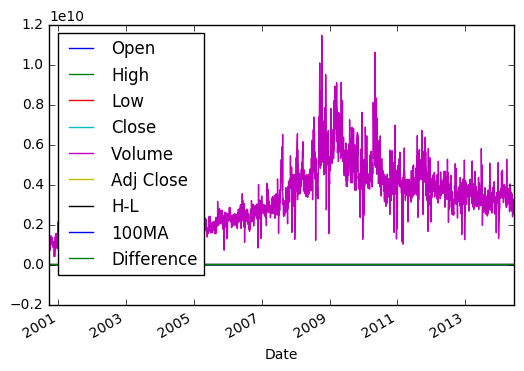

In [16]:
import matplotlib.pyplot as plt;
df.plot();
plt.show()

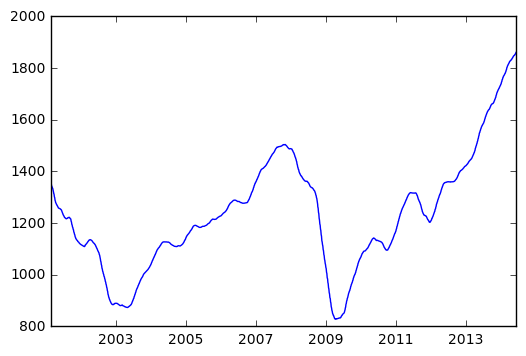

In [17]:
plt.plot(df['100MA']);#this is how matplotlib plots,pandas is better
plt.show()


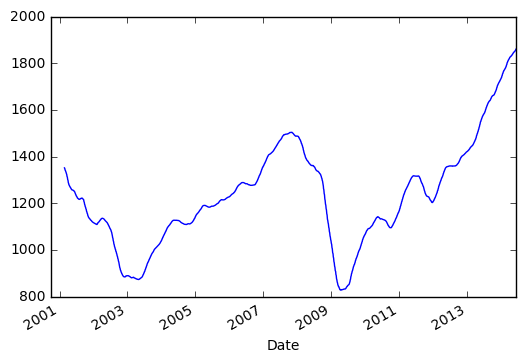

In [18]:
df['100MA'].plot();# pandas also show the name of the axis 'Date'
plt.show()

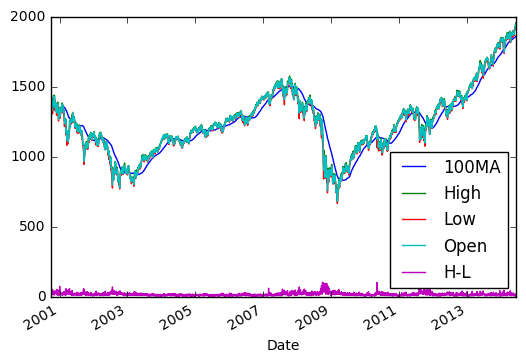

In [19]:
df[['100MA', 'High', 'Low', 'Open', 'H-L']].plot();# for more columns list of lists
plt.show()